**Titanic Dataset Good Scoring = Simple Data Cleaning + Simple Feature Engineering + Ensemble model**

I am begineer trying to understand This dataset from basic level. If you are a begineer it can also help you.

## Importing All necesery Liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading Datasets

In [2]:
train_df = pd.read_csv('train.csv')
test_original = pd.read_csv('test.csv')
test_df = test_original.copy()

In [3]:
df = pd.concat([train_df,test_df], axis = 0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


## Insights:
- we got 11 features to predict Survived or not survived Label.
- PassengerID is Primary key : unique for each entry so of no use. 
- Numerical columns: 5 
- Sting columns: 5
- Continous data: Age and Fare 
- Categorical Data: Pclass,Sibsp,Parch, Embarked.
- Categorical String Data: Sex, Embarked.
- String Data: Name, Ticket, Cabin.

## Missing Values analysis

In [5]:
pd.isnull(df).sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# Visuals

<Axes: >

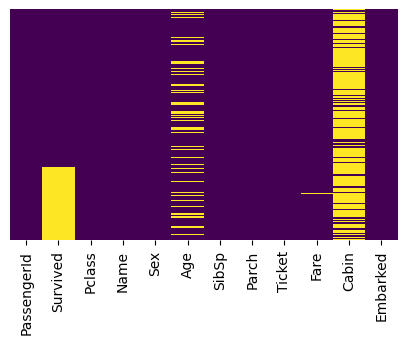

In [6]:
plt.figure(figsize=(5,3))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Insights:
- Survived column have missing values for test dataset.
- Age Column have lots of missing values.
- 1 missing value for Fair.
- 2 missing values for Embarked.

### We will do oulier analysis on Continous data : Age and Fare column.
- Age got multiple missing values so if it will be perfectly distributed then we can use groupby methord to generalise and fill missing values on that basis.
- Fare should be chaecked beacaue there can be some outliers which can harm our ML model.

## Outlier analysis:

<Axes: xlabel='Age', ylabel='Density'>

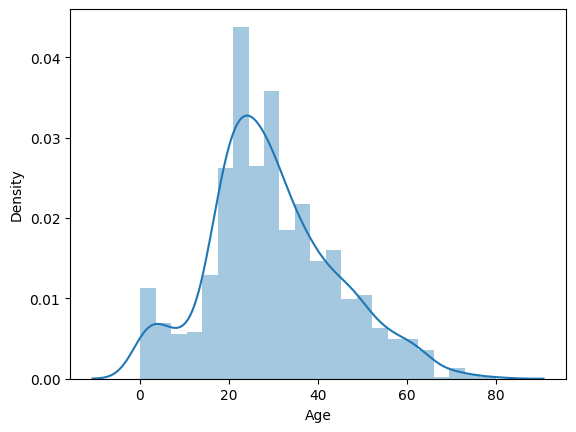

In [7]:
sns.distplot(df['Age'])

# Insights:
- Age column have good distribution.
- We gets a perfect bell like shape so its good.

<Axes: xlabel='Fare', ylabel='Density'>

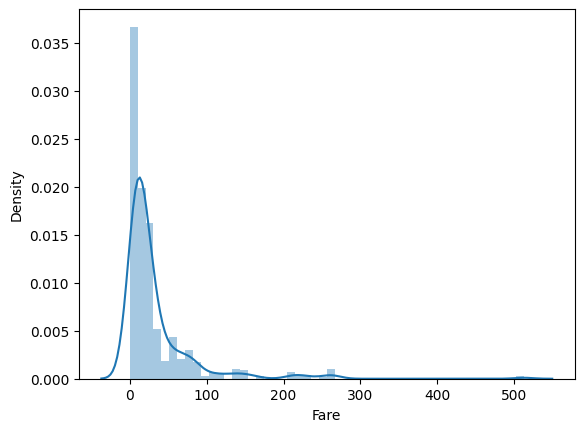

In [8]:
sns.distplot(df['Fare'])

## Insights:
- There are outliers on upper as well as lower side.
- For upper side we can clearly see that there are outliers above 250
- lets check our dataframe to understand this in better way.

In [9]:
df[df['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
343,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


aah Fair is same for all the people traveling together.
<br>
## Create a new Feature to store Price. 
- Price will be Fare divided by count of people having same ticket 

In [10]:
temp_df = df[['Ticket','Fare']].value_counts().reset_index()
temp_df['Price'] = temp_df['Fare']/temp_df[0]
temp_df.rename(columns={0:'Ticket_Count'},inplace=True)
temp_df

,Ticket,Fare,Ticket_Count,Price
0,CA. 2343,69.5500,11,6.322727
1,1601,56.4958,8,7.061975
2,CA 2144,46.9000,8,5.862500
3,3101295,39.6875,7,5.669643
4,347077,31.3875,7,4.483929
...,...,...,...,...
924,342826,8.0500,1,8.050000
925,343095,8.0500,1,8.050000
926,343120,7.6500,1,7.650000
927,343271,7.0000,1,7.000000


- Now we have ticket count as well as Price for each ticket. 
- Now I will do left join on both the tables on Ticket and Fare.

In [11]:
df =pd.merge(df,temp_df, how ='left', on=['Ticket','Fare'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Count,Price
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,7.250000
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,35.641650
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,7.925000
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,26.550000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,8.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1.0,8.050000
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,3.0,36.300000
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1.0,7.250000
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1.0,8.050000


### Boom Now i have Ticket count as well as Price for each passenger.

<Axes: xlabel='Price', ylabel='Density'>

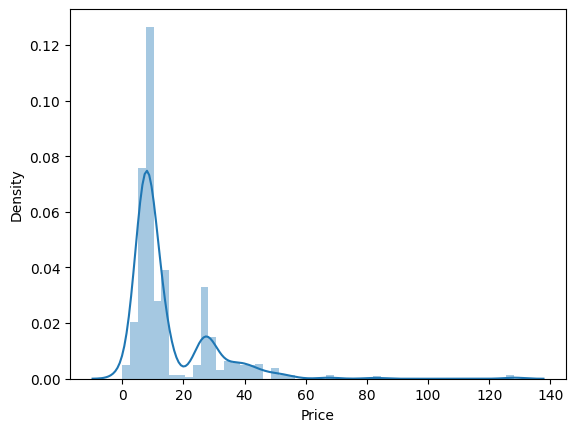

In [12]:
sns.distplot(df['Price'])

Now Distribution is Looking Good , Well again there are only few values between 70 to 140 so you we can remove it or alter it .

In [13]:
df[df['Price']>70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Count,Price
118,119,0.0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,3.0,82.506933
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,4.0,128.082300
299,300,1.0,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,3.0,82.506933
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,4.0,128.082300
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,4.0,128.082300
1075,1076,NaN,1,"Douglas, Mrs. Frederick Charles (Mary Helene B...",female,27.0,1,1,PC 17558,247.5208,B58 B60,C,3.0,82.506933
1234,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,4.0,128.082300


In [14]:
df['Price'].replace(to_replace=128.082300,value=np.nan,inplace=True)

- Just removing the higest value so that we can alter it later?
### Checking Lower Bound of price

In [15]:
df[df['Price']< 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Count,Price
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,4.0,0.0
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,1.0,0.0
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,4.0,0.0
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,3.0,0.0
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,4.0,0.0
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,3.0,0.0
466,467,0.0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,3.0,0.0
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,1.0,0.0
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,4.0,0.0
633,634,0.0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,1.0,0.0


- Mostly Dead people paid 0$, Even there Age and Cabin is missing.
- Sorry lets have some respect for dead people. actully they paid but data collection can't be done.
-I need to Make 1 more feature so that i can apply group by on more better way.


### Making New feature Cabin_Count
- It will give the count of cabin a particular passenger booked.

In [16]:
def cabin_count(x):
    if str(x) == 'nan':
        return 0
    else: return len(str(x).split(" "))
    

In [17]:
df['Cabin_Count'] =df['Cabin'].apply(cabin_count)

In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Count,Price,Cabin_Count
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,7.250000,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,35.641650,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,7.925000,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,26.550000,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,8.050000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1.0,8.050000,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,3.0,36.300000,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1.0,7.250000,0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1.0,8.050000,0


- Now Replacing 0$ with nan so that we can alter it in next steps. 

In [19]:
df['Price'].replace(to_replace=0,value=np.nan,inplace=True)

- Creating a table which will give median value of Price on the basis of Sex, Ticket_count, and Cabin_Count 

In [20]:
ddf =df.groupby(['Sex','Ticket_Count','Cabin_Count'])['Price'].median().reset_index()
# ddf

In [21]:
df1 = df.copy()

In [22]:
df1 = pd.merge(df1,ddf, how='left',on=['Sex','Ticket_Count','Cabin_Count'])

- Now we will fill the null values of Price as median price on the basis of Sex, Ticket_count , and Cabin_Count.

In [23]:
df['Price'] =df['Price'].fillna(df1['Price_y'])

- Still there are some null values simply putting median of Price there. 

In [24]:
df['Price'].fillna(df['Price'].median(), inplace=True)

<Axes: xlabel='Price', ylabel='Density'>

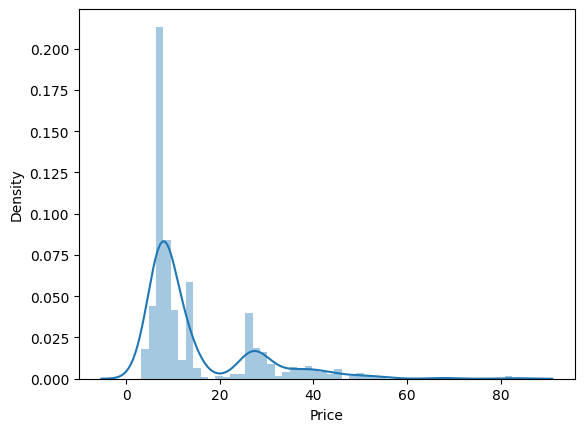

In [25]:
sns.distplot(df['Price'])

## Insights:
- Finally Distribution of Price column is looking good and clearly we can see 3 different sections.
- 0-20 one section ,20 to 45 another section and 45 to above another class. 
- May be it represt the Price of Different Pclass.
### we were able to convert the distribution range of Fare from 0 to 500 to range of 3 to 90.
### Outlier analysis done

## Now focusing on filling missing values

In [26]:
pd.isnull(df).sum()

PassengerId        0
Survived         418
Pclass             0
Name               0
Sex                0
Age              263
SibSp              0
Parch              0
Ticket             0
Fare               1
Cabin           1014
Embarked           2
Ticket_Count       1
Price              0
Cabin_Count        0
dtype: int64

- Survived missing values is not we are worried about.
- Lets try to fill the missing values of Age.

## Making a new feature title.
- using the name column we will try to find  their title.

In [27]:
df['title']  =df.Name.str.split(', ').str[1].str.split('. ').str[0]

In [28]:
df['title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
th            1
Jonkheer      1
Dona          1
Name: title, dtype: int64

There are so many title we need to make catagories of similer titles.

In [29]:
df.loc[df.title.eq('Mrs'), 'title'] = 'Mrs'
df.loc[df.title.eq('Mr'), 'title'] = 'Mr'

df.loc[df.title.isin(['Miss','Ms']),'title'] = 'Miss'
df.loc[df.title.eq('Master'),'title'] = 'Master'

df.loc[~df.title.isin(['Mrs','Mr','Miss','Master']),'title'] = 'Celeb'

- Mrs ,Mr, Master will as it is.
- Miss and Ms will be as Miss.
- Title not as Mrs ,Mr, Master ,Miss and Ms will be as Celeb

In [30]:
titles = list(df.title.unique())
for title in titles:
    df.loc[(df.Age.isna() & df.title.eq(title)), 'Age'] = df.loc[df.title.eq(title), 'Age'].median()

### Filled the Age of pasangers as median Age on the basis of title from which this passenger belongs to. 

In [31]:
pd.isnull(df).sum()

PassengerId        0
Survived         418
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               1
Cabin           1014
Embarked           2
Ticket_Count       1
Price              0
Cabin_Count        0
title              0
dtype: int64

- missing 1 value in fare , 2 in Embarked and 1 in Ticket count. 
- We made Price column to replace Fare so no need to fill its null value.
## After age lets fill missing values for Embarked

In [32]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Count,Price,Cabin_Count,title
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,2.0,40.0,1,Miss
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,2.0,40.0,1,Mrs


- Google said Mrs Martha Evelyn Embarked from Charlestown, Massachusetts with her maid.  

In [33]:
df['Embarked'].fillna('C',inplace=True)

There is one missing value in Ticket_Count lets check

In [34]:
df[df['Ticket_Count'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Count,Price,Cabin_Count,title
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,8.05,0,Mr


ok it should be 1 

In [35]:
df['Ticket_Count'].fillna(1,inplace=True)

## Making New Feature Family count 

In [36]:
df['family']= 1+ df['SibSp'] + df['Parch']

In [ ]:
## Creating New 

In [37]:
def is_alone_cabin(df):
    df['IsAlone'] = 1
    df['IsAlone'].loc[df['family'] > 1] = 0
    df['IsCabin'] = 1 
    df['IsCabin'].loc[df['Cabin'].isna()] = 0
    return df

In [38]:
df = is_alone_cabin(df)

In [39]:
df['Age_Range']=pd.cut(df['Age'],6,labels=[1,2,3,4,5,6])

In [41]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [42]:
df['c*f']= df['Fare']*df['Pclass']

# EDA

In [43]:
def show_val(x):
    sns.catplot(x = x, y ='Survived', data=df, kind='bar', n_boot=1)
    plt.title(f'{x} vs Survival ')
    plt.show()
    print(df.groupby(x)['Survived'].mean().reset_index())

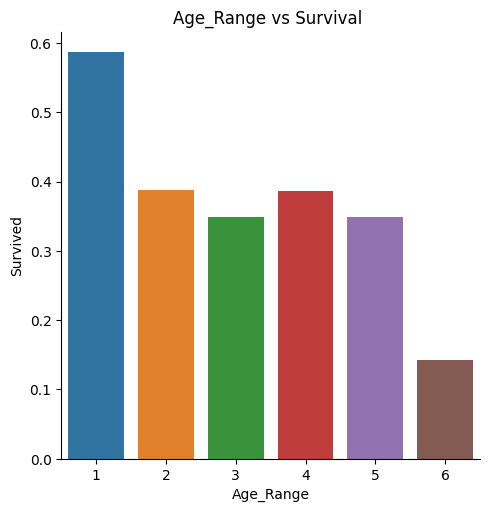

  Age_Range  Survived
0         1  0.586667
1         2  0.387324
2         3  0.349081
3         4  0.386139
4         5  0.348837
5         6  0.142857


In [45]:
show_val('Age_Range')

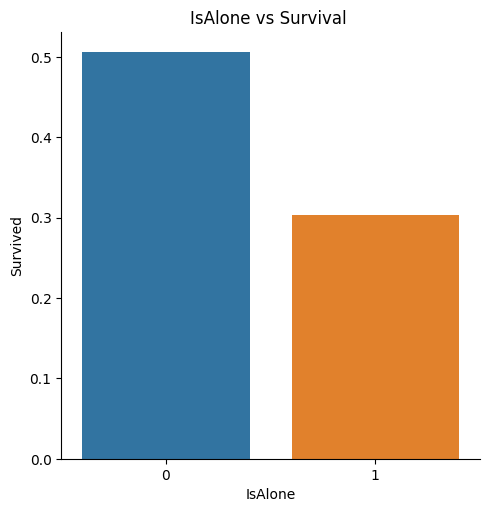

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [46]:
show_val('IsAlone')

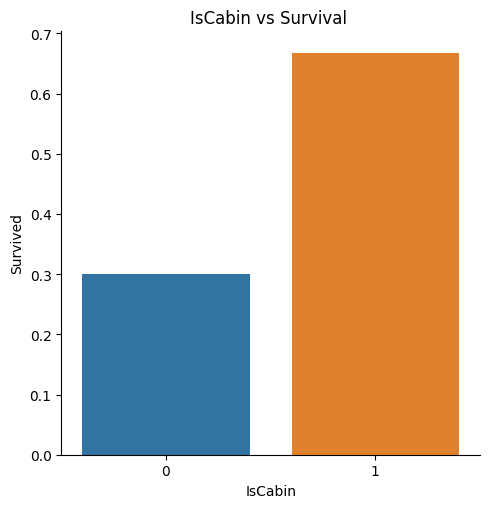

   IsCabin  Survived
0        0  0.299854
1        1  0.666667


In [47]:
show_val('IsCabin')

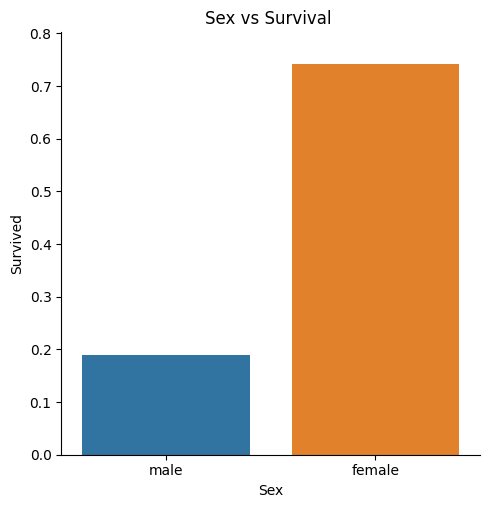

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [48]:
show_val('Sex')

Insights:
- Male survival chance: 19%
- Female survival chance 74%

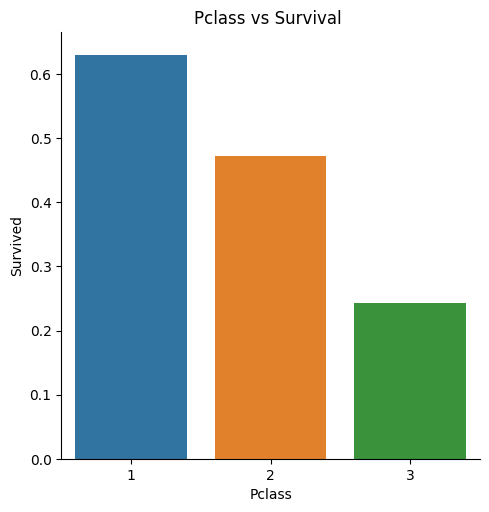

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [49]:
show_val('Pclass')

Insights:
- Pclass 1 survival chance: 63%
- Pclass 2 survival chance 47%
- Pclass 3 survival chance 24%

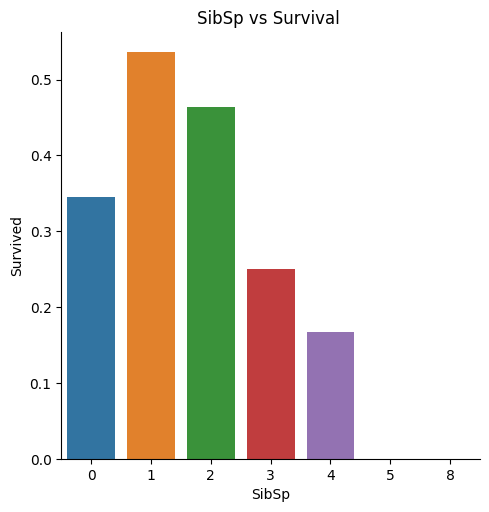

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


In [50]:
show_val('SibSp')

Insights:
- 0% survival rate for  SibSp as 5 and 8
- Good survival changes for SibSp as 1 and 2

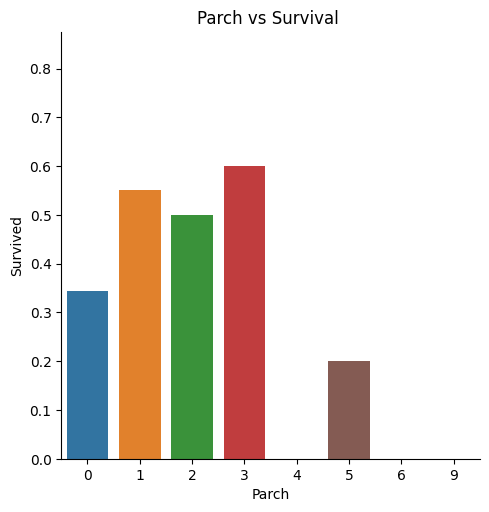

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
7      9       NaN


In [51]:
show_val('Parch')

## Insight:
- 0% survival chances for Parch: 4 ,6 and 9
- 60% survival chance for Parchas 3

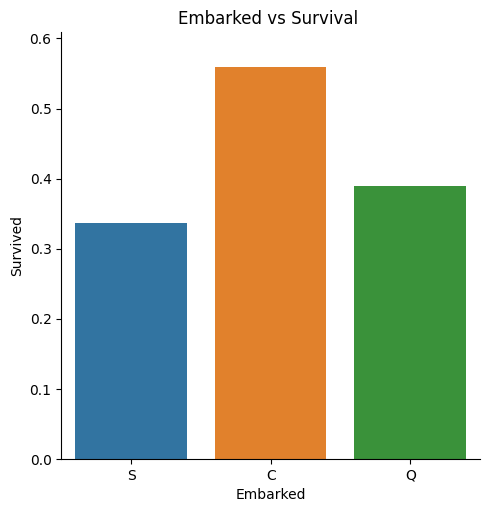

  Embarked  Survived
0        C  0.558824
1        Q  0.389610
2        S  0.336957


In [52]:
show_val('Embarked')

## Insights:
More Surival chances for those who embarked from C but it is also like 50-50

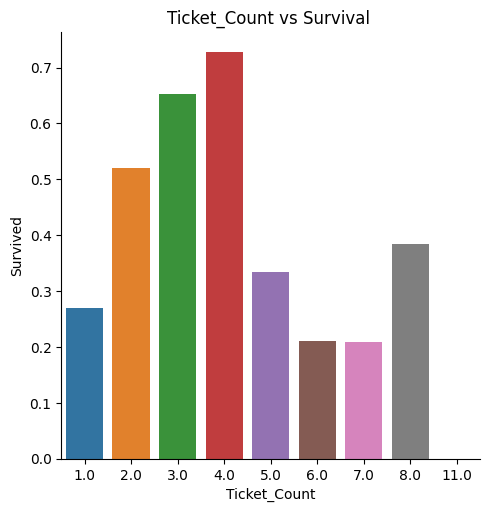

   Ticket_Count  Survived
0           1.0  0.269151
1           2.0  0.519553
2           3.0  0.653465
3           4.0  0.727273
4           5.0  0.333333
5           6.0  0.210526
6           7.0  0.208333
7           8.0  0.384615
8          11.0  0.000000


In [53]:
show_val('Ticket_Count')

## Insights:
- Ticket count as 4 and 3 is more survival chances.
- Ticket count as 11 ,6 and 7 have very low chances

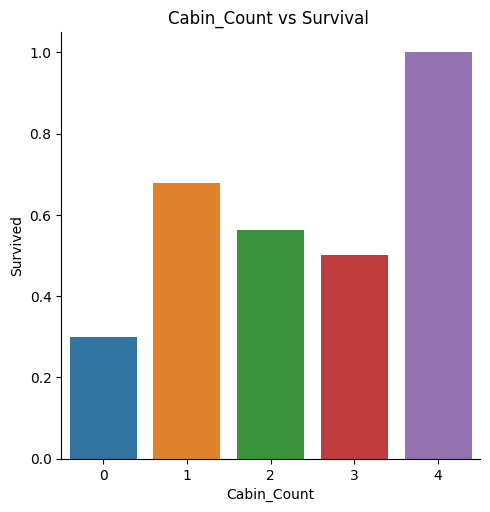

   Cabin_Count  Survived
0            0  0.299854
1            1  0.677778
2            2  0.562500
3            3  0.500000
4            4  1.000000


In [54]:
show_val('Cabin_Count')

## Insights:
- Those who got 4 cabins they all survived.
-those who got 1 cabin they allso have more than 50% chance.

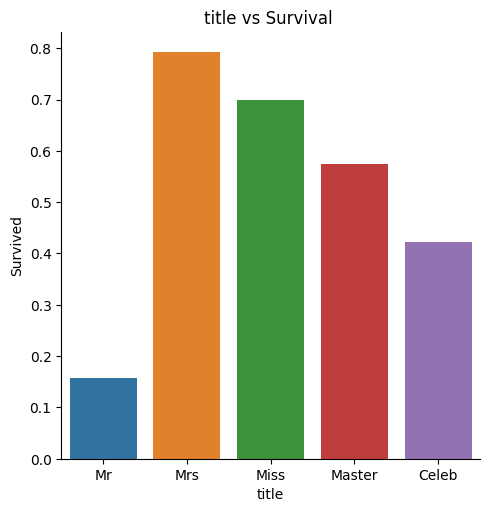

    title  Survived
0   Celeb  0.423077
1  Master  0.575000
2    Miss  0.699454
3      Mr  0.156673
4     Mrs  0.792000


In [55]:
show_val('title')

# Insights:
- Mrs , Miss have more chanes of survival

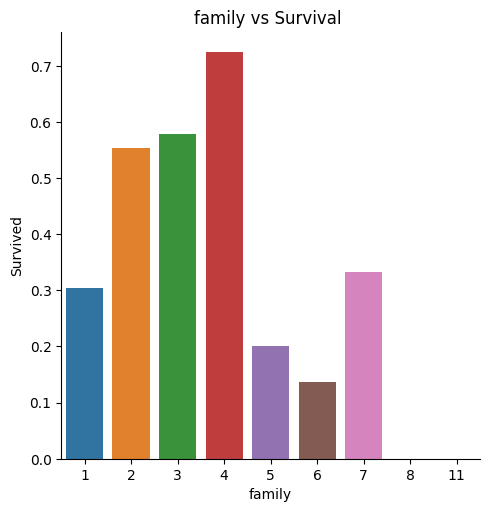

   family  Survived
0       1  0.303538
1       2  0.552795
2       3  0.578431
3       4  0.724138
4       5  0.200000
5       6  0.136364
6       7  0.333333
7       8  0.000000
8      11  0.000000


In [56]:
show_val('family')

## Insights:
- Family size as 11 and 8 have 0% surtvival rate.
- Family size as 6,5,1 have very low chances.
- Family size as 4 and 3 have more Surival chances.

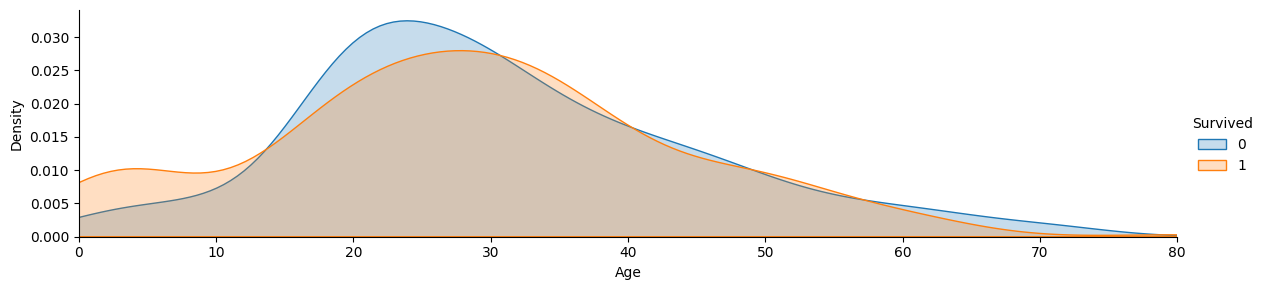

In [57]:
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()
 
plt.show() 

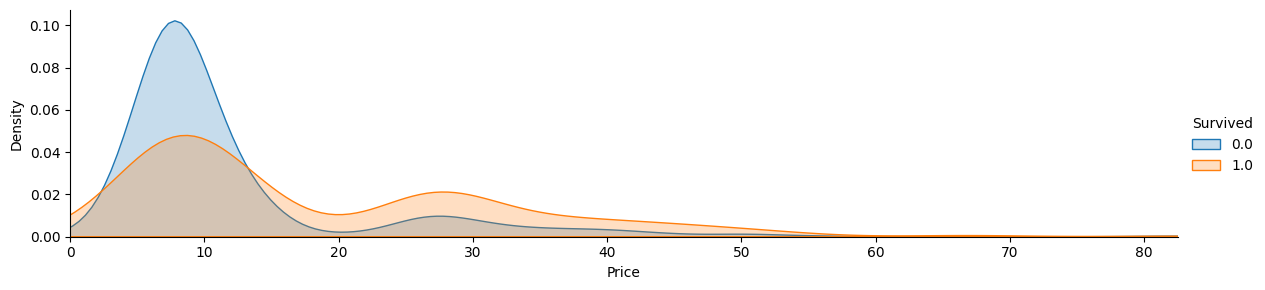

In [58]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Price',shade= True)
facet.set(xlim=(0, df['Price'].max()))
facet.add_legend()
 
plt.show()  

## Droping Unused columns

In [59]:
df.drop(['Fare','family'],axis=1,inplace=True)

## One-Hot-Encoding
- many columns are already label encoded but some text catagorical columns needs one hot encoding

In [60]:
# def dum(df,x):
#     dum1 = pd.get_dummies(df[x], drop_first=True)
#     df = pd.concat([df,dum1],axis=1)
#     df.drop(x,axis=1,inplace=True)
#     return df
        

In [61]:
# for i in ['Sex','Embarked','title']:
#     df = dum(df ,i)

- One hot encoding for Sex, Embarked and title columns.

In [62]:
correlation = df.corr()['Survived'].sort_values(ascending=False)
correlation

Survived        1.000000
IsCabin         0.316912
Price           0.277940
Cabin_Count     0.277053
c*f             0.183627
Parch           0.081629
Ticket_Count    0.065920
PassengerId    -0.005007
SibSp          -0.035322
Age            -0.071235
IsAlone        -0.203367
Pclass         -0.338481
Name: Survived, dtype: float64

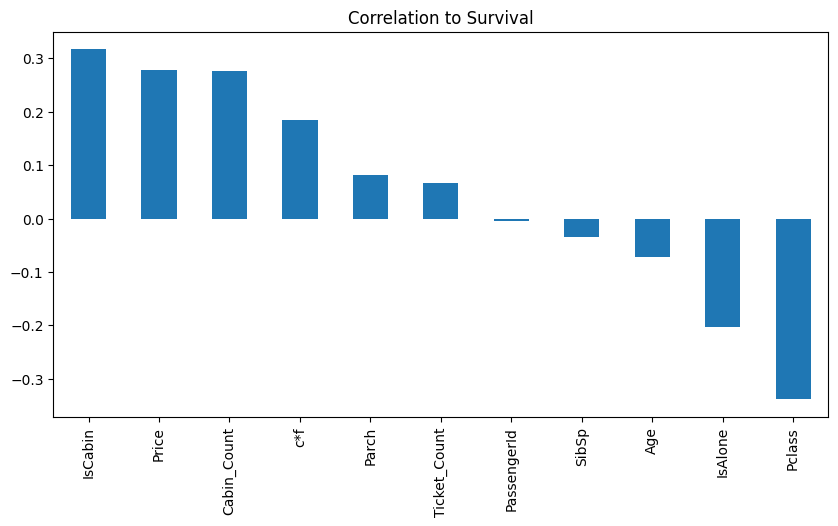

In [63]:
correlation[1:].plot(kind='bar', figsize=(10,5), title='Correlation to Survival')
plt.show()

## Well correlations map says it all:
- Male with Mr title Traveling in Pclass 3 and Embarked from Southampton mostly died.
- Females with Mrs and Miss title who booked 4 Cabins have higher chances of survival.
- We can bet better insights if we do one hot encoding on family count, cabin count and ticket count. but for now we will leave it.

### now cuting data set to test and train dataset again as we joined then above.

In [64]:
test = df[df['PassengerId']>=892]
train = df[df['PassengerId']<892]

### Droping PassengerId from train and test dataset.

In [65]:
train.drop('PassengerId',axis=1,inplace=True)
test.drop('PassengerId',axis=1,inplace=True)

In [66]:
import category_encoders as ce
target = train['Survived']
# Define catboost encoder
cbe_encoder = ce.cat_boost.CatBoostEncoder()
  
# Fit encoder and transform the features
cbe_encoder.fit(train, target)
train = cbe_encoder.transform(train)

test = cbe_encoder.transform(test)

In [67]:
correlation = train.corr()['Survived'].sort_values(ascending=False)
correlation

Survived        1.000000
title           0.564852
Ticket          0.552837
Sex             0.543351
Cabin           0.376591
IsCabin         0.316912
Price           0.277940
Cabin_Count     0.277053
c*f             0.183627
Embarked        0.177288
Age_Range       0.137843
Parch           0.081629
Ticket_Count    0.065920
SibSp          -0.035322
Age            -0.071235
IsAlone        -0.203367
Pclass         -0.338481
Name                 NaN
Name: Survived, dtype: float64

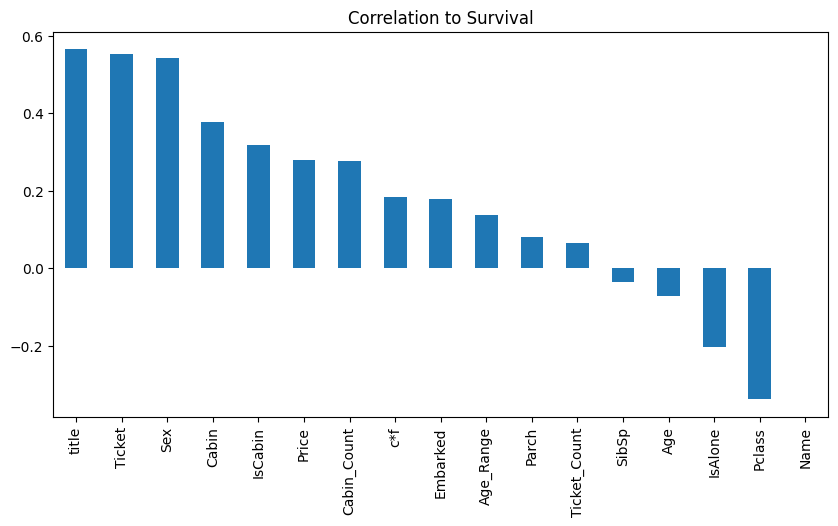

In [69]:
correlation[1:].plot(kind='bar', figsize=(10,5), title='Correlation to Survival')
plt.show()

<Axes: >

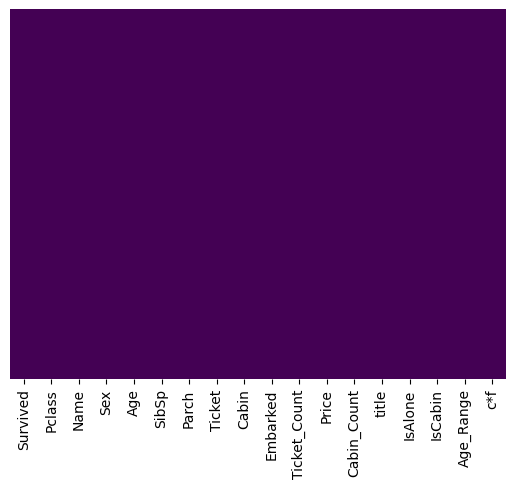

In [70]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

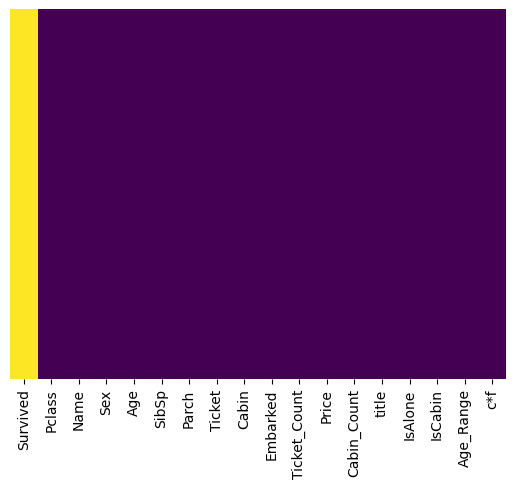

In [71]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [72]:
from sklearn.model_selection import train_test_split, cross_val_score

In [73]:
x = train.drop('Survived',axis=1)
y = train['Survived']

### Spliting dataset into train and test dataset

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40)

- This is the parameter I am using for cat plot.

In [75]:
best_params = {'border_count': 64, 'depth': 7, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.01, 'random_strength': 5}

### Ensambling
- Now i am using some models together to predict better result.
- Use grid search for hyperparamet tuning.I am using random values.

In [76]:
from sklearn import ensemble ,gaussian_process, naive_bayes, neighbors,svm,tree, discriminant_analysis, linear_model
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report , confusion_matrix

- I am using 16 different models to make my ensamble model

In [77]:
voter = [
    ('ada' , ensemble.AdaBoostClassifier(n_estimators=300, learning_rate=0.1, random_state=0)),
    ('bag' , ensemble.BaggingClassifier(max_samples=0.25, n_estimators=300,random_state=0)),
    ('etc' , ensemble.ExtraTreesClassifier(criterion='entropy', n_estimators=100, max_depth=6, random_state=0)),
    ('gbc' , ensemble.GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=3)),
    ('rfc' , ensemble.RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=500, oob_score= True, random_state=0)),
    ('gpc' , gaussian_process.GaussianProcessClassifier(max_iter_predict=3, random_state=0)),
    ('rcc' , linear_model.RidgeClassifierCV()),
    ('bnb' , naive_bayes.BernoulliNB(alpha= 0.1)),
    ('knc' , neighbors.KNeighborsClassifier(algorithm='brute', n_neighbors=3, weights='uniform')),
    ('svc' , svm.SVC(probability=True)),
    ('nvc' , svm.NuSVC(probability=True)),
    ('lvc' , svm.LinearSVC()),
    ('dtc' , tree.DecisionTreeClassifier()),
    ('ttc' , tree.ExtraTreeClassifier()),
    ('lda' , discriminant_analysis.LinearDiscriminantAnalysis()),
    ('cat', CatBoostClassifier(**best_params, verbose=False))
    
    
    ]



#### Now voting will be done for each prediction by each model and then final prediction will be done.
- using hard voting

In [78]:
vote_m = ensemble.VotingClassifier(estimators = voter , voting = 'hard')

In [79]:
vote_m.fit(x_train,y_train)
pred = vote_m.predict(x_test)

In [80]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       207
         1.0       0.92      0.75      0.82       150

    accuracy                           0.87       357
   macro avg       0.88      0.85      0.86       357
weighted avg       0.87      0.87      0.86       357

[[197  10]
 [ 38 112]]


### Confusion materix:
- 199 is correctly predicted as not survived.
- 97 is correctly predicted as survived.
- 24 died but our model predicted as survived.
- 37 Survived but predicted as Survived.

In [81]:
mod_pred = cross_val_score(vote_m,x,y,cv=5,verbose=0)
print('Accuracy: ',round(mod_pred.mean()*100,2),'%')

Accuracy:  87.88 %


# Model Average Accuracy is 83.5% 
-Thats good

Making Df with PassengerID and Survived column 

In [82]:
pd.isnull(test).sum()

Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Cabin             0
Embarked          0
Ticket_Count      0
Price             0
Cabin_Count       0
title             0
IsAlone           0
IsCabin           0
Age_Range         0
c*f               0
dtype: int64

In [83]:
submission_df = pd.DataFrame()
submission_df['PassengerId'] = test_original['PassengerId'] 
submission_df['Survived'] =vote_m.predict(test.drop('Survived',axis=1)).astype(int) 

In [84]:
submission_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [85]:
for i in [1005,961,962,1083,1268,929,938,1128,1186,1258]:
    display(submission_df[submission_df['PassengerId']==i])

,PassengerId,Survived
113,1005,1


,PassengerId,Survived
69,961,1


,PassengerId,Survived
70,962,0


,PassengerId,Survived
191,1083,0


,PassengerId,Survived
376,1268,0


,PassengerId,Survived
37,929,0


,PassengerId,Survived
46,938,0


,PassengerId,Survived
236,1128,0


,PassengerId,Survived
294,1186,0


,PassengerId,Survived
366,1258,0


## Submission

In [86]:
submission_df.to_csv('Manual_submission.csv', index=False)

# Thank you For Considering this Notebook. 

![](https://media.tenor.com/VPtj_CuypecAAAAC/cant-thankyou-enough.gif)